<a href="https://colab.research.google.com/github/vmcarranzam/pd_final/blob/main/Proyecto_Final_Product_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

 Carga de datos de los JSON


In [3]:
condiciones_path = 'condiciones.json'
deficiencias_path = 'deficiencias.json'

Lectura de archivos JSON


In [4]:
condiciones = pd.read_json(condiciones_path)
deficiencias = pd.read_json(deficiencias_path)

Asociando las condiciones con las categorías de deficiencias

In [5]:
merged_data = condiciones.merge(deficiencias, left_on="categoria", right_on="tag")


Selección de columnas relevantes

In [6]:
dataset = merged_data[["nombre_x", "sintomas", "categoria"]]
dataset.rename(columns={"nombre_x": "condicion", "categoria": "categoria"}, inplace=True)



<ipython-input-6-72e515d21452>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.rename(columns={"nombre_x": "condicion", "categoria": "categoria"}, inplace=True)


Llenando valores nulos en síntomas con cadenas vacías

In [7]:
dataset["sintomas"].fillna("", inplace=True)

<ipython-input-7-e3cfff52f213>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["sintomas"].fillna("", inplace=True)
<ipython-input-7-e3cfff52f213>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["sintomas"].fillna("", inplace=True)


Codificación de categorías

In [8]:
category_mapping = {category: idx for idx, category in enumerate(dataset["categoria"].unique())}
dataset["categoria_cod"] = dataset["categoria"].map(category_mapping)


<ipython-input-8-fceb0b3d67bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["categoria_cod"] = dataset["categoria"].map(category_mapping)


Separación de características y etiquetas

In [9]:
X = dataset["sintomas"]
y = dataset["categoria_cod"]

Conversión de características a vectores numéricos


In [10]:
vectorizer = TfidfVectorizer(max_features=100)
X_vectorized = vectorizer.fit_transform(X).toarray()


División de datos de entrenamiento y prueba

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


Definición y entrenamiento del modelo Random Forest

In [12]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predicciones del set de prueba

In [13]:
y_pred = model.predict(X_test)


In [14]:
print(y_pred)

[0 3 0 0 1]


Evaluación de precisión del modelo

In [15]:
accuracy = accuracy_score(y_test, y_pred)

In [16]:
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.8


Matriz de confusión

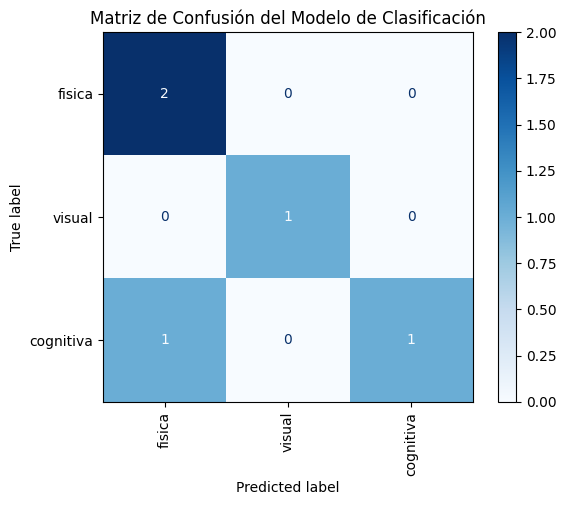

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = sorted(set(y_test) | set(y_pred))
label_names = [list(category_mapping.keys())[list(category_mapping.values()).index(label)] for label in unique_labels]
conf_matrix_adjusted = confusion_matrix(y_test, y_pred, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_adjusted, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Matriz de Confusión del Modelo de Clasificación")
plt.show()

Tabla de resultados

In [20]:
evaluation_data = pd.DataFrame({
    "Síntomas reales": vectorizer.inverse_transform(X_test),
    "Categoría real": [list(category_mapping.keys())[list(category_mapping.values()).index(cat)] for cat in y_test],
    "Predicción del modelo": [list(category_mapping.keys())[list(category_mapping.values()).index(pred)] for pred in y_pred]
})

evaluation_data.head(10)

,Síntomas reales,Categoría real,Predicción del modelo
0,"[cuello, defecar, dolor, el, en, extremidades,...",fisica,fisica
1,"[con, de, edad, en, eventos, la, los, memoria,...",cognitiva,cognitiva
2,"[con, cuello, de, dedo, en, gordo, grande, la,...",cognitiva,fisica
3,"[caminar, déficit, hablar, movimientos, oír, p...",fisica,fisica
4,"[de, disminución, dolor, el, en, la, ojo, visión]",visual,visual
